# Concentration de CO2 dans l'atmosphère depuis 1958

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.optimize as opt

## Chargement des données

Vérifie si le fichier contenant les données est présent. S'il ne l'est pas, télécharge le fichier.

In [2]:
data_url = "https://scrippsco2.ucsd.edu/assets/data/atmospheric/stations/in_situ_co2/monthly/monthly_in_situ_co2_mlo.csv"
data_file = "montly_co2.csv"

import os
import urllib.request
if not os.path.exists(data_file):
    urllib.request.urlretrieve(data_url, data_file)

Nous chargeons les données depuis le fichier CSV.

In [3]:
raw_data = pd.read_csv(data_file, encoding = 'iso-8859-1', skiprows=60, header=[1], skipinitialspace=True)
raw_data

Yr    Mn   Date     Date.1     CO2 seasonally     fit  seasonally.1  \
0       NaN   NaN    NaN        NaN     NaN   adjusted     NaN  adjusted fit   
1       NaN   NaN  Excel        NaN   [ppm]     [ppm]    [ppm]         [ppm]   
2    1958.0   1.0  21200  1958.0411  -99.99     -99.99  -99.99        -99.99   
3    1958.0   2.0  21231  1958.1260  -99.99     -99.99  -99.99        -99.99   
4    1958.0   3.0  21259  1958.2027  315.71     314.43  316.20        314.90   
5    1958.0   4.0  21290  1958.2877  317.45     315.15  317.30        314.98   
6    1958.0   5.0  21320  1958.3699  317.51     314.68  317.89        315.06   
7    1958.0   6.0  21351  1958.4548  -99.99     -99.99  317.27        315.14   
8    1958.0   7.0  21381  1958.5370  315.87     315.20  315.85        315.21   
9    1958.0   8.0  21412  1958.6219  314.93     316.23  313.95        315.28   
10   1958.0   9.0  21443  1958.7068  313.21     316.13  312.42        315.35   
11   1958.0  10.0  21473  1958.7890  -99.99     -99.99  312.41        315.40   
12   1958.0  11.0  21504  1958.8740  313.33     315.21  313.60        315.46   
13   1958.0  12.0  21534  1958.9562  314.67     315.43  314.76        315.51   
14   1959.0   1.0  21565  1959.0411  315.58     315.52  315.64        315.57   
15   1959.0   2.0  21596  1959.1260  316.49     315.83  316.29        315.63   
16   1959.0   3.0  21624  1959.2027  316.65     315.37  316.99        315.69   
17   1959.0   4.0  21655  1959.2877  317.72     315.41  318.09        315.77   
18   1959.0   5.0  21685  1959.3699  318.29     315.46  318.68        315.85   
19   1959.0   6.0  21716  1959.4548  318.15     316.00  318.08        315.94   
20   1959.0   7.0  21746  1959.5370  316.54     315.87  316.67        316.03   
21   1959.0   8.0  21777  1959.6219  314.79     316.10  314.79        316.12   
22   1959.0   9.0  21808  1959.7068  313.84     316.76  313.28        316.22   
23   1959.0  10.0  21838  1959.7890  313.33     316.35  313.30        316.31   
24   1959.0  11.0  21869  1959.8740  314.81     316.70  314.53        316.39   
25   1959.0  12.0  21899  1959.9562  315.58     316.35  315.72        316.47   
26   1960.0   1.0  21930  1960.0410  316.43     316.37  316.62        316.55   
27   1960.0   2.0  21961  1960.1257  316.98     316.33  317.30        316.64   
28   1960.0   3.0  21990  1960.2049  317.58     316.27  318.04        316.71   
29   1960.0   4.0  22021  1960.2896  319.03     316.69  319.14        316.79   
..      ...   ...    ...        ...     ...        ...     ...           ...   
788  2023.0   7.0  45122  2023.5370  421.62     420.82  421.71        420.95   
789  2023.0   8.0  45153  2023.6219  419.56     421.11  419.66        421.26   
790  2023.0   9.0  45184  2023.7068  418.06     421.56  418.06        421.57   
791  2023.0  10.0  45214  2023.7890  418.41     422.01  418.29        421.88   
792  2023.0  11.0  45245  2023.8740  420.11     422.37  419.96        422.19   
793  2023.0  12.0  45275  2023.9562  421.65     422.57  421.59        422.49   
794  2024.0   1.0  45306  2024.0410  422.62     422.55  422.87        422.79   
795  2024.0   2.0  45337  2024.1257  424.34     423.56  423.87        423.08   
796  2024.0   3.0  45366  2024.2049  425.22     423.66  424.93        423.35   
797  2024.0   4.0  45397  2024.2896  426.30     423.51  426.45        423.64   
798  2024.0   5.0  45427  2024.3716  426.70     423.31  427.30        423.91   
799  2024.0   6.0  45458  2024.4563  426.62     424.07  426.72        424.19   
800  2024.0   7.0  45488  2024.5383  425.40     424.63  425.20        424.46   
801  2024.0   8.0  45519  2024.6230  422.70     424.29  423.11        424.74   
802  2024.0   9.0  45550  2024.7077  421.60     425.11  421.49        425.02   
803  2024.0  10.0  45580  2024.7896  422.05     425.65  421.69        425.28   
804  2024.0  11.0  45611  2024.8743  423.61     425.86  423.31        425.53   
805  2024.0  12.0  45641  2024.9563  425.01     425.93  424.87        425.77   
806  2025

Il y a un problème avec les premières colonnes. Nous renommons les colonnes et enlèvons les deux premières lignes qui ne correspondent pas à des données.

In [4]:
raw_data = raw_data.rename(columns={"seasonally.1":"seasonally adjusted fit", 
                "seasonally.2":"seasonally adjusted filled",
                "CO2.1":"CO2 filled",
                "Date":"Date excel",
                "Date.1":"Date",
                "seasonally":"seasonally adjusted"})
raw_data = raw_data[2:]
raw_data

Yr    Mn Date excel       Date     CO2 seasonally adjusted     fit  \
2    1958.0   1.0      21200  1958.0411  -99.99              -99.99  -99.99   
3    1958.0   2.0      21231  1958.1260  -99.99              -99.99  -99.99   
4    1958.0   3.0      21259  1958.2027  315.71              314.43  316.20   
5    1958.0   4.0      21290  1958.2877  317.45              315.15  317.30   
6    1958.0   5.0      21320  1958.3699  317.51              314.68  317.89   
7    1958.0   6.0      21351  1958.4548  -99.99              -99.99  317.27   
8    1958.0   7.0      21381  1958.5370  315.87              315.20  315.85   
9    1958.0   8.0      21412  1958.6219  314.93              316.23  313.95   
10   1958.0   9.0      21443  1958.7068  313.21              316.13  312.42   
11   1958.0  10.0      21473  1958.7890  -99.99              -99.99  312.41   
12   1958.0  11.0      21504  1958.8740  313.33              315.21  313.60   
13   1958.0  12.0      21534  1958.9562  314.67              315.43  314.76   
14   1959.0   1.0      21565  1959.0411  315.58              315.52  315.64   
15   1959.0   2.0      21596  1959.1260  316.49              315.83  316.29   
16   1959.0   3.0      21624  1959.2027  316.65              315.37  316.99   
17   1959.0   4.0      21655  1959.2877  317.72              315.41  318.09   
18   1959.0   5.0      21685  1959.3699  318.29              315.46  318.68   
19   1959.0   6.0      21716  1959.4548  318.15              316.00  318.08   
20   1959.0   7.0      21746  1959.5370  316.54              315.87  316.67   
21   1959.0   8.0      21777  1959.6219  314.79              316.10  314.79   
22   1959.0   9.0      21808  1959.7068  313.84              316.76  313.28   
23   1959.0  10.0      21838  1959.7890  313.33              316.35  313.30   
24   1959.0  11.0      21869  1959.8740  314.81              316.70  314.53   
25   1959.0  12.0      21899  1959.9562  315.58              316.35  315.72   
26   1960.0   1.0      21930  1960.0410  316.43              316.37  316.62   
27   1960.0   2.0      21961  1960.1257  316.98              316.33  317.30   
28   1960.0   3.0      21990  1960.2049  317.58              316.27  318.04   
29   1960.0   4.0      22021  1960.2896  319.03              316.69  319.14   
30   1960.0   5.0      22051  1960.3716  320.03              317.19  319.70   
31   1960.0   6.0      22082  1960.4563  319.59              317.44  319.04   
..      ...   ...        ...        ...     ...                 ...     ...   
788  2023.0   7.0      45122  2023.5370  421.62              420.82  421.71   
789  2023.0   8.0      45153  2023.6219  419.56              421.11  419.66   
790  2023.0   9.0      45184  2023.7068  418.06              421.56  418.06   
791  2023.0  10.0      45214  2023.7890  418.41              422.01  418.29   
792  2023.0  11.0      45245  2023.8740  420.11              422.37  419.96   
793  2023.0  12.0      45275  2023.9562  421.65              422.57  421.59   
794  2024.0   1.0      45306  2024.0410  422.62              422.55  422.87   
795  2024.0   2.0      45337  2024.1257  424.34              423.56  423.87   
796  2024.0   3.0      45366  2024.2049  425.22              423.66  424.93   
797  2024.0   4.0      45397  2024.2896  426.30              423.51  426.45   
798  2024.0   5.0      45427  2024.3716  426.70              423.31  427.30   
799  2024.0   6.0      45458  2024.4563  426.62              424.07  426.72   
800  2024.0   7.0      45488  2024.5383  425.40              424.63  425.20   
801  2024.0   8.0      45519  2024.6230  422.70              424.29  423.11   
802  2024.0   9.0      45550  2024.7077  421.60              425.11  421.49   
803  2024.0  10.0      45580  2024.7896  422.05              425.65  421.69   
804  2024.0  11.0      45611  2024.8743  423.61              425.86  423.31   
805  2024.0  12.0      45641  2024.9563  425.01              425.93  424.87   
806  2025.0   1.0      45672  2025.0411  426.42            

Nous supprimons les lignes pour lesquelles la concentration atmosphérique en CO$_2$ est inférieure ou égale à zéro.

In [5]:
data = raw_data[np.array(raw_data["CO2"], dtype="float")>0]
data = data[np.array(data["seasonally adjusted fit"], dtype="float")>0]
data

Yr    Mn Date excel       Date     CO2 seasonally adjusted     fit  \
4    1958.0   3.0      21259  1958.2027  315.71              314.43  316.20   
5    1958.0   4.0      21290  1958.2877  317.45              315.15  317.30   
6    1958.0   5.0      21320  1958.3699  317.51              314.68  317.89   
8    1958.0   7.0      21381  1958.5370  315.87              315.20  315.85   
9    1958.0   8.0      21412  1958.6219  314.93              316.23  313.95   
10   1958.0   9.0      21443  1958.7068  313.21              316.13  312.42   
12   1958.0  11.0      21504  1958.8740  313.33              315.21  313.60   
13   1958.0  12.0      21534  1958.9562  314.67              315.43  314.76   
14   1959.0   1.0      21565  1959.0411  315.58              315.52  315.64   
15   1959.0   2.0      21596  1959.1260  316.49              315.83  316.29   
16   1959.0   3.0      21624  1959.2027  316.65              315.37  316.99   
17   1959.0   4.0      21655  1959.2877  317.72              315.41  318.09   
18   1959.0   5.0      21685  1959.3699  318.29              315.46  318.68   
19   1959.0   6.0      21716  1959.4548  318.15              316.00  318.08   
20   1959.0   7.0      21746  1959.5370  316.54              315.87  316.67   
21   1959.0   8.0      21777  1959.6219  314.79              316.10  314.79   
22   1959.0   9.0      21808  1959.7068  313.84              316.76  313.28   
23   1959.0  10.0      21838  1959.7890  313.33              316.35  313.30   
24   1959.0  11.0      21869  1959.8740  314.81              316.70  314.53   
25   1959.0  12.0      21899  1959.9562  315.58              316.35  315.72   
26   1960.0   1.0      21930  1960.0410  316.43              316.37  316.62   
27   1960.0   2.0      21961  1960.1257  316.98              316.33  317.30   
28   1960.0   3.0      21990  1960.2049  317.58              316.27  318.04   
29   1960.0   4.0      22021  1960.2896  319.03              316.69  319.14   
30   1960.0   5.0      22051  1960.3716  320.03              317.19  319.70   
31   1960.0   6.0      22082  1960.4563  319.59              317.44  319.04   
32   1960.0   7.0      22112  1960.5383  318.18              317.53  317.59   
33   1960.0   8.0      22143  1960.6230  315.90              317.24  315.65   
34   1960.0   9.0      22174  1960.7077  314.17              317.11  314.09   
35   1960.0  10.0      22204  1960.7896  313.83              316.85  314.07   
..      ...   ...        ...        ...     ...                 ...     ...   
780  2022.0  11.0      44880  2022.8740  417.03              419.27  416.72   
781  2022.0  12.0      44910  2022.9562  418.46              419.38  418.25   
782  2023.0   1.0      44941  2023.0411  419.13              419.06  419.45   
783  2023.0   2.0      44972  2023.1260  420.33              419.56  420.39   
784  2023.0   3.0      45000  2023.2027  420.51              418.98  421.37   
785  2023.0   4.0      45031  2023.2877  422.73              419.98  422.87   
786  2023.0   5.0      45061  2023.3699  423.78              420.39  423.75   
787  2023.0   6.0      45092  2023.4548  423.39              420.82  423.21   
788  2023.0   7.0      45122  2023.5370  421.62              420.82  421.71   
789  2023.0   8.0      45153  2023.6219  419.56              421.11  419.66   
790  2023.0   9.0      45184  2023.7068  418.06              421.56  418.06   
791  2023.0  10.0      45214  2023.7890  418.41              422.01  418.29   
792  2023.0  11.0      45245  2023.8740  420.11              422.37  419.96   
793  2023.0  12.0      45275  2023.9562  421.65              422.57  421.59   
794  2024.0   1.0      45306  2024.0410  422.62              422.55  422.87   
795  2024.0   2.0      45337  2024.1257  424.34              423.56  423.87   
796  2024.0   3.0      45366  2024.2049  425.22              423.66  424.93   
797  2024.0   4.0      45397  2024.2896  426.30              423.51  426.45   
798  2024.0   5.0      45427  2024.3716  426.70            

## Premiers graphiques

Nous convertissons les données de certaines colonnes, qui sont de type `str`, en type `float`.

In [6]:
data["CO2"] = data["CO2"].astype("float")
data["seasonally adjusted"] = data["seasonally adjusted"].astype("float")
data["seasonally adjusted fit"] = data["seasonally adjusted fit"].astype("float")

Nous affichons les données brutes ainsi que des données moyennées afin de faire disparaitre les variations saisonnières (dites `seasonally adjusted`). Nous constatons une hausse globalle de la concentration en CO$_2$ dans l'atmosphère ainsi que des variations saisonnières qui semblent à première vue sinusoidales.

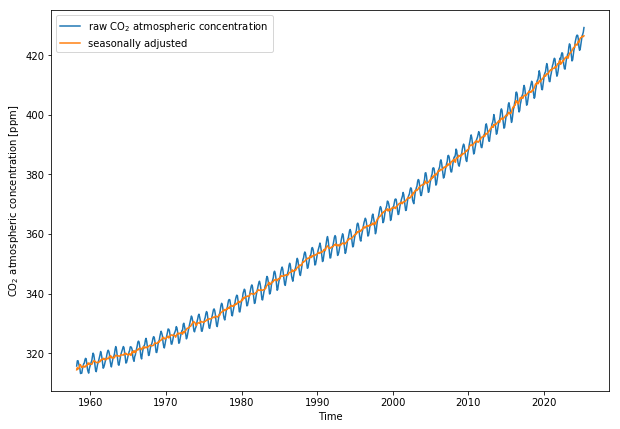

In [7]:
fig, ax = plt.subplots(figsize=(10,7))
ax.plot(data["Date"], data["CO2"], label=r"raw CO$_2$ atmospheric concentration")
ax.plot(data["Date"], data["seasonally adjusted"], label=r"seasonally adjusted")
ax.set_xlabel("Time")
ax.set_ylabel("CO$_2$ atmospheric concentration [ppm]")
ax.legend()

## Etude des variations saisonnières

Nous nous intéressons dans un premier temps à caractériser les variations saisonnières. Nous soustrayons aux données brutes les données moyennées, de façon à ne faire apparaitre que les variations saisonnières.

In [8]:
data["seasonal variations"] = data["CO2"] - data["seasonally adjusted"]
data["seasonal variations"]

4      1.28
5      2.30
6      2.83
8      0.67
9     -1.30
10    -2.92
12    -1.88
13    -0.76
14     0.06
15     0.66
16     1.28
17     2.31
18     2.83
19     2.15
20     0.67
21    -1.31
22    -2.92
23    -3.02
24    -1.89
25    -0.77
26     0.06
27     0.65
28     1.31
29     2.34
30     2.84
31     2.15
32     0.65
33    -1.34
34    -2.94
35    -3.02
       ... 
780   -2.24
781   -0.92
782    0.07
783    0.77
784    1.53
785    2.75
786    3.39
787    2.57
788    0.80
789   -1.55
790   -3.50
791   -3.60
792   -2.26
793   -0.92
794    0.07
795    0.78
796    1.56
797    2.79
798    3.39
799    2.55
800    0.77
801   -1.59
802   -3.51
803   -3.60
804   -2.25
805   -0.92
806    0.07
807    0.79
808    1.54
809    2.77
Name: seasonal variations, Length: 801, dtype: float64

Nous traçons les données ainsi obtenues. Nous constatons que les variations saisonnières semblent bien sinusoidales mais que leur amplitude varie au cours du temps.

Text(0,0.5,'CO$_2$ atmospheric concentration seasonal variations [ppm]')

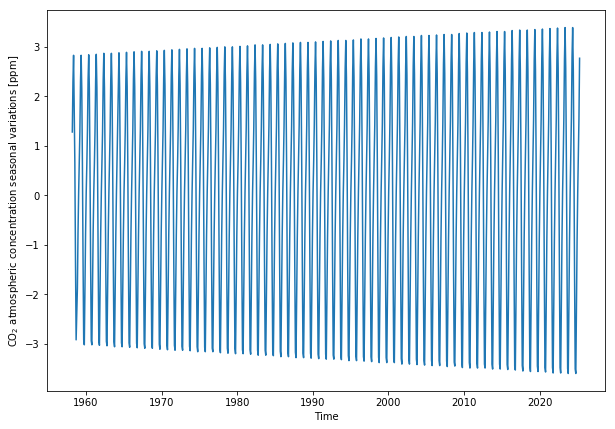

In [9]:
fig, ax = plt.subplots(figsize=(10,7))
ax.plot(data["Date"], data["seasonal variations"])
ax.set_xlabel("Time")
ax.set_ylabel("CO$_2$ atmospheric concentration seasonal variations [ppm]")

Au vu de la forme des données nous choisissons de les modéliser par une fonction de la forme suivante :

$$ f(t) = (A+Bt) \: \sin(\omega t + \phi)$$

Nous allons ainsi réaliser un fit des données par ce modèle en utilisant la bibliothèque `spicy.optimize` (voir la [documentation](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.curve_fit.html)). Cela nous permettra d'estimer les valeurs des paramètres $A$, $B$, $\omega$ et $\phi$ correspondant le mieux à notre jeu de données.

*Note : Le fit n'est réalisé que sur les 500 derniers points car il converge vers un résultat aberrant lorsqu'il est réalisé sur l'ensemble des points, visblement pour des raisons numériques. Les 500 derniers points comprennent plusieurs dizaines d'oscillations et sont ainsi représentatifs du reste des données.*

In [10]:
f = lambda t, a, b, omega, phi: (a+b*t)*np.sin(omega*t + phi)

In [12]:
# Valeurs initiales des paramètres
tt = np.array(data["Date"])
yy = np.array(data["seasonal variations"])
ff = np.fft.fftfreq(len(tt), (tt[1]-tt[0]))
Fyy = abs(np.fft.fft(data["seasonal variations"]))
guess_freq = abs(ff[np.argmax(Fyy[1:])+1])
guess_amp = np.std(yy) *3/ 2.**0.5
guess_offset = np.mean(yy)
p_0 = np.array([guess_amp, 1e-5, 2.*np.pi*guess_freq, guess_offset])

# Noms des paramètres
param = ['A', 'B', 'omega', 'phi']

# Calculs des valeurs optimales des paramètres
p_opt, p_cov = opt.curve_fit(f, data["Date"][-500:], data["seasonal variations"][-500:], sigma=None, p0=p_0, 
                             method='lm')

# Calcul de la liste des ordonnées du fit pour chaque valeur de x
y_fit = f(data["Date"], *p_opt)

# Affichage console
expr_str = "y = (A + B*t) * sin(omega*t + phi)"
print(" Fit sinusoidal :", expr_str)
print(" Résultats du fit : ")
for i, p in enumerate(param):
    sig = np.sqrt(p_cov[i][i])
    print(f" {p} = %.5f ± %.5f" % (p_opt[i], sig))

 Fit sinusoidal : y = (A + B*t) * sin(omega*t + phi)
 Résultats du fit : 
 A = -11.45904 ± 6.39356
 B = 0.00719 ± 0.00319
 omega = 6.28308 ± 0.00109
 phi = -201.20182 ± 2.18862


L'incertitude obtenue sur le paramètre $\omega$, qui caractérise la fréquence des oscillations, semble plutôt faible. Les incertitudes sur les paramètres $A$ et $B$, qui caractérisent l'amplitude, sont cependant importantes.  

Nous calculons la période des oscillations $T = 2\pi \: / \: \omega$. Celle-ci est comme attendu égale à 1 an, aux incertitudes liées au fit près.

In [13]:
T = (2*np.pi)/p_opt[2]
dT = T * np.sqrt(p_cov[2][2])/p_opt[2]
print(f" T = %.5f ± %.5f yr" % (T, dT))

 T = 1.00002 ± 0.00017 yr


Nous affichons ici les données ainsi que le modèle correspondant le mieux. Nous voyons que notre modèle reproduit bien la forme générale des données.

L'amplitude obtenue par le fit semble en première approximation reproduire les données correctement. Elle est cependant un peu plus faible qu'en réalité, comme montré par les valeurs des résidus qui peuvent approcher 1 pour une valeur caractéristique de l'amplitude de l'ordre de 3. Un affinement du fit serait ainsi utile afin de caractériser plus précisément l'amplitude des oscillations. 

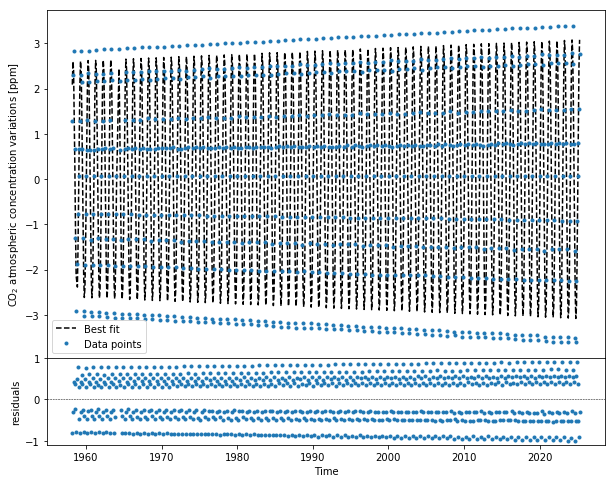

In [15]:
t = data["Date"]
y = data["seasonal variations"]

fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(10,8),
                               gridspec_kw={'height_ratios': [4, 1]})
fig.subplots_adjust(hspace=0)
ax1.errorbar(t, y, fmt='o', ms=3., linewidth=1, label="Data points")
ax1.plot(t, y_fit, ls='--', c='k', label="Best fit")
ax2.plot(t, (y-y_fit), 'o', ms=3.)
ax2.axhline(0, ls='--', c='k', lw=0.5)
ax1.set_ylabel(r"CO$_2$ atmospheric concentration variations [ppm]")
ax2.set_ylabel(r"residuals")
ax2.set_xlabel(r"Time")
ax1.legend(loc="lower left")
ax1.tick_params(labelsize=10)
ax2.tick_params(labelsize=10)

Même chose en n'affichant que les années les plus récentes. On voit que le fit semble reproduire de façon adéquate la forme des oscillations. Notre modèle caractérise donc de façon adéquate les variations saisonnières de la concentration de CO$_2$ dans l'atmosphère, reproduisant précisément leur fréquence et approximativement leur amplitude. 

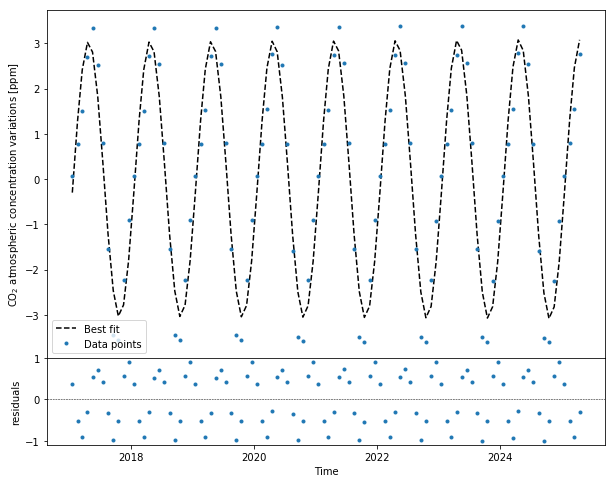

In [16]:
t = data["Date"][-100:]
y = data["seasonal variations"][-100:]

fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(10,8),
                               gridspec_kw={'height_ratios': [4, 1]})
fig.subplots_adjust(hspace=0)
ax1.errorbar(t, y, fmt='o', ms=3., linewidth=1, label="Data points")
ax1.plot(t, y_fit[-100:], ls='--', c='k', label="Best fit")
ax2.plot(t, (y-y_fit[-100:]), 'o', ms=3.)
ax2.axhline(0, ls='--', c='k', lw=0.5)
ax1.set_ylabel(r"CO$_2$ atmospheric concentration variations [ppm]")
ax2.set_ylabel(r"residuals")
ax2.set_xlabel(r"Time")
ax1.legend(loc="lower left")
ax1.tick_params(labelsize=10)
ax2.tick_params(labelsize=10)

## Etude de l'évolution lente

Nous étudions maintenant l'évolution lente de la concentration de CO$_2$ dans l'atmosphère. Nous commençons par tracer les données corrigées des variations saisonnières.

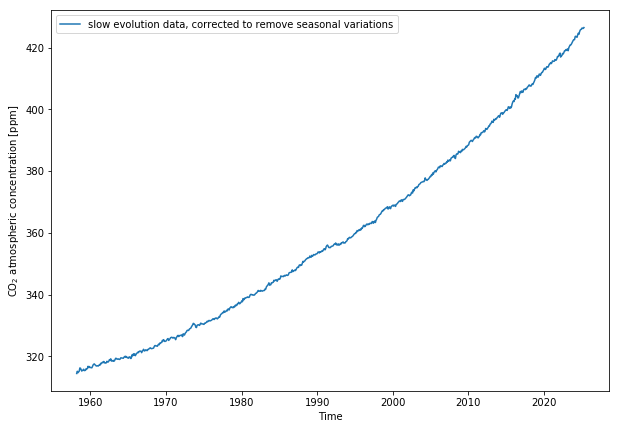

In [19]:
fig, ax = plt.subplots(figsize=(10,7))
ax.plot(data["Date"], data["seasonally adjusted"], 
        label=r"slow evolution data, corrected to remove seasonal variations")
ax.set_xlabel("Time")
ax.set_ylabel("CO$_2$ atmospheric concentration [ppm]")
ax.legend()

Nous choisissons dans un premier temps de modéliser l'évolution lente par un simple modèle polynomial de degré 2 :

$$ f(t) = At^2 + Bt + C$$

In [20]:
f = lambda t, a, b, c : a*t**2 + b*t + c

In [21]:
# Valeurs initiales des paramètres
p_0 = np.array([1., 1e-3, 1.])

# Noms des paramètres
param = ['A', 'B', 'C']

# Calculs des valeurs optimales des paramètres
p_opt, p_cov = opt.curve_fit(f, data["Date"], data["seasonally adjusted"], sigma=None, p0=p_0, 
                             method='lm')

# Calcul de la liste des ordonnées du fit pour chaque valeur de x
y_fit = f(data["Date"], *p_opt)

# Affichage console
expr_str = "y = A*t**2 + B*t + C"
print(" Fit polynomial :", expr_str)
print(" Résultats du fit : ")
for i, p in enumerate(param):
    sig = np.sqrt(p_cov[i][i])
    print(f" {p} = %.5f ± %.5f" % (p_opt[i], sig))

 Fit polynomial : y = A*t**2 + B*t + C
 Résultats du fit : 
 A = 0.01361 ± 0.00008
 B = -52.56990 ± 0.31250
 C = 51069.44683 ± 311.21431


Nous traçons comme précédemment les données ainsi que le modèle qui correspond le mieux. Nous constatons visuellement que ce modèle, pourtant très simple, reproduit bien les données. Les erreurs relatives sont en effets inférieures ou égales à environ 0.5 % sur l'ensemble des points. Nous choisissons donc de conserver ce modèle, qui caractérise de façon suffisamment précise l'évolution de la concentration de CO$_2$ dans l'atmosphère sur le temps long.

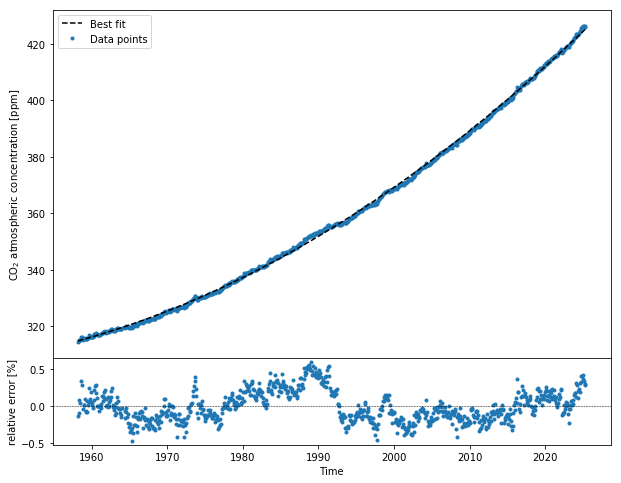

In [23]:
t = data["Date"]
y = data["seasonally adjusted"]

fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(10,8),
                               gridspec_kw={'height_ratios': [4, 1]})
fig.subplots_adjust(hspace=0)
ax1.errorbar(t, y, fmt='o', ms=3., linewidth=1, label="Data points")
ax1.plot(t, y_fit, ls='--', c='k', label="Best fit", zorder=3)
ax2.plot(t, (y-y_fit)/y*100, 'o', ms=3.)
ax2.axhline(0, ls='--', c='k', lw=0.5)
ax1.set_ylabel(r"CO$_2$ atmospheric concentration [ppm]")
ax2.set_ylabel(r"relative error [%]")
ax2.set_xlabel(r"Time")
ax1.legend(loc="upper left")
ax1.tick_params(labelsize=10)
ax2.tick_params(labelsize=10)